In [9]:
import pandas as pd
import numpy as np

data=pd.read_csv("/content/clustering - Sheet1 (1).csv")

In [10]:
data

,GDP per Capita,Life Expectancy,Literacy Rate,Unemployment Rate,Access to Clean Water,Poverty Rate,Country
0,1548.814,55.68434,68.20993,15.046950,61.35474,38.558030,Country 1
1,1715.189,50.18790,60.97101,21.778170,62.98282,30.117140,Country 2
2,1602.763,56.17635,68.37945,17.700080,65.69965,33.599780,Country 3
3,1544.883,56.12096,60.96098,22.351940,65.90873,37.299910,Country 4
4,1423.655,56.16934,69.76459,24.621890,65.74325,31.716300,Country 5
...,...,...,...,...,...,...,...
95,3490.305,78.81720,89.06733,9.610557,86.33461,14.979620,Country 96
96,3989.410,72.72437,90.52078,5.447473,94.80580,8.621891,Country 97
97,3065.304,73.79057,87.71653,7.029712,93.71786,9.706489,Country 98
98,3783.234,73.74296,89.55444,5.121566,90.02721,8.782452,Country 99


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GDP per Capita         100 non-null    float64
 1   Life Expectancy        100 non-null    float64
 2   Literacy Rate          100 non-null    float64
 3   Unemployment Rate      100 non-null    float64
 4   Access to Clean Water  100 non-null    float64
 5   Poverty Rate           100 non-null    float64
 6   Country                100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [12]:
list(data)

['GDP per Capita',
 'Life Expectancy',
 'Literacy Rate',
 'Unemployment Rate',
 'Access to Clean Water',
 'Poverty Rate',
 'Country']

In [13]:
features = data.drop('Country', axis=1)
features

,GDP per Capita,Life Expectancy,Literacy Rate,Unemployment Rate,Access to Clean Water,Poverty Rate
0,1548.814,55.68434,68.20993,15.046950,61.35474,38.558030
1,1715.189,50.18790,60.97101,21.778170,62.98282,30.117140
2,1602.763,56.17635,68.37945,17.700080,65.69965,33.599780
3,1544.883,56.12096,60.96098,22.351940,65.90873,37.299910
4,1423.655,56.16934,69.76459,24.621890,65.74325,31.716300
...,...,...,...,...,...,...
95,3490.305,78.81720,89.06733,9.610557,86.33461,14.979620
96,3989.410,72.72437,90.52078,5.447473,94.80580,8.621891
97,3065.304,73.79057,87.71653,7.029712,93.71786,9.706489
98,3783.234,73.74296,89.55444,5.121566,90.02721,8.782452


In [15]:
list(data)# Country is not deleted from data .only feature doesnt have country column

['GDP per Capita',
 'Life Expectancy',
 'Literacy Rate',
 'Unemployment Rate',
 'Access to Clean Water',
 'Poverty Rate',
 'Country']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [17]:
# draw a scatter plot of scaled_features to know the pattern of the data

<Axes: xlabel='Access to Clean Water', ylabel='Literacy Rate'>

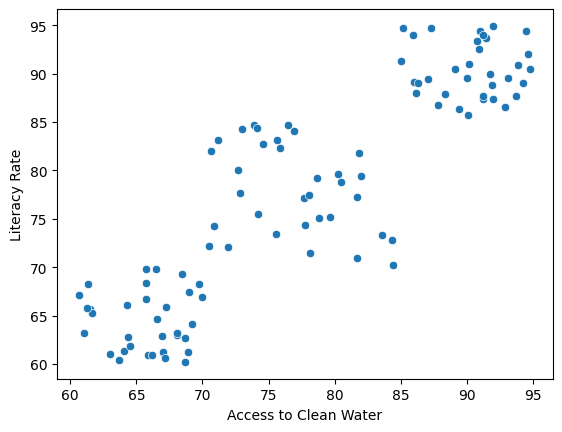

In [18]:
import seaborn as sns
sns.scatterplot(x=data['Access to Clean Water'], y=data['Literacy Rate'])


## What Is the Random Initialization Trap?
Random Start: K-means begins by randomly selecting initial centroids from your data.

Impact: Different initial choices can lead to different final clusters,
which means your results can vary with each run.

# How to Mitigate It

## 1. n_clusters
What It Is: Number of clusters you want to divide your data into.


Example: If you set n_clusters=3, the algorithm will find 3 clusters in your data.
### 2. init
What It Is: Method for initializing the centroids (starting points) of the clusters.
Options:
'k-means++': A smarter way to pick initial centroids.
'random': Picks random points from the data.


Example: init='k-means++' often gives better results than random initialization.
### 3. n_init
What It Is: Number of times to run the K-means algorithm with different initial centroids.
Purpose: Helps find the best clustering result by trying multiple random starts.


Example: n_init=10 means K-means will run 10 times with different initial centroids and pick the best result.
### 4. max_iter
What It Is: Maximum number of iterations for each run of the K-means algorithm.
Purpose: Limits how long the algorithm will run to prevent it from running forever.


Example: max_iter=300 means the algorithm will stop if it doesn't converge within 300 iterations.


###  With n_init=2, K-Means will start with 2 different random sets of centroids.


### For each of these 2 sets, it will iterate up to 300 times if needed to converge.

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=15)  # Example with 3 clusters
data['Cluster'] = kmeans.fit_predict(scaled_features)
data

,GDP per Capita,Life Expectancy,Literacy Rate,Unemployment Rate,Access to Clean Water,Poverty Rate,Country,Cluster
0,1548.814,55.68434,68.20993,15.046950,61.35474,38.558030,Country 1,2
1,1715.189,50.18790,60.97101,21.778170,62.98282,30.117140,Country 2,2
2,1602.763,56.17635,68.37945,17.700080,65.69965,33.599780,Country 3,2
3,1544.883,56.12096,60.96098,22.351940,65.90873,37.299910,Country 4,2
4,1423.655,56.16934,69.76459,24.621890,65.74325,31.716300,Country 5,2
...,...,...,...,...,...,...,...,...
95,3490.305,78.81720,89.06733,9.610557,86.33461,14.979620,Country 96,1
96,3989.410,72.72437,90.52078,5.447473,94.80580,8.621891,Country 97,1
97,3065.304,73.79057,87.71653,7.029712,93.71786,9.706489,Country 98,1
98,3783.234,73.74296,89.55444,5.121566,90.02721,8.782452,Country 99,1


In [35]:
cp=data.groupby('Country').mean()
cp

,GDP per Capita,Life Expectancy,Literacy Rate,Unemployment Rate,Access to Clean Water,Poverty Rate,Cluster
Country,,,,,,,
Country 1,1548.814,55.68434,68.20993,15.046950,61.35474,38.558030,2.0
Country 10,1383.442,56.97631,60.39188,17.230820,63.67562,37.936980,2.0
Country 100,3288.398,77.48788,89.01714,6.713055,94.22348,14.795270,1.0
Country 11,1791.725,50.60225,62.82807,24.527490,64.35865,32.239250,2.0
Country 12,1528.895,56.66767,61.20197,19.471250,68.91923,33.453520,2.0
...,...,...,...,...,...,...,...
Country 95,3638.762,77.30709,93.96761,7.652686,91.18826,8.044464,1.0
Country 96,3490.305,78.81720,89.06733,9.610557,86.33461,14.979620,1.0
Country 97,3989.410,72.72437,90.52078,5.447473,94.80580,8.621891,1.0


In [37]:
data["Country"][data["Cluster"]==1] #POOR

,Country
66,Country 67
67,Country 68
68,Country 69
69,Country 70
70,Country 71
71,Country 72
72,Country 73
73,Country 74
74,Country 75
75,Country 76


In [38]:
data["Country"][data["Cluster"]==0] #RICH

,Country
33,Country 34
34,Country 35
35,Country 36
36,Country 37
37,Country 38
38,Country 39
39,Country 40
40,Country 41
41,Country 42
42,Country 43


<Axes: xlabel='GDP per Capita', ylabel='Literacy Rate'>

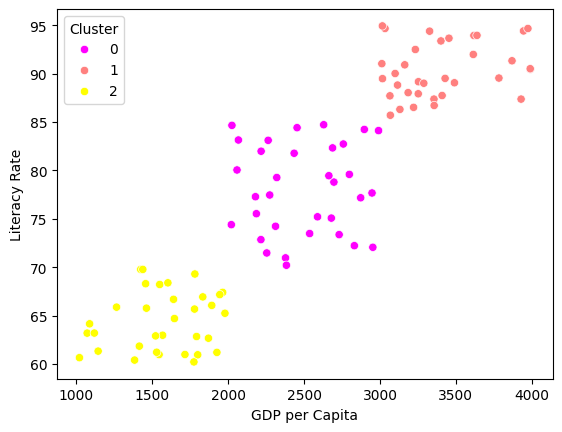

In [39]:
sns.scatterplot(x=data['GDP per Capita'], y=data['Literacy Rate'],hue=data["Cluster"],palette="spring")


# Silhouette Score:

Measures how well data points are assigned to their clusters:


Values range from -1 to 1.


A higher score indicates well-separated clusters.

In [40]:
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [41]:
#Evaluate Clustering

# Silhouette Score: Measure how well the clusters are separated.

from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, labels)

print(silhouette_avg)

0.631640138719835


# how can we know the number of clusters???

# elbow method

In [42]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [43]:
# Apply the Elbow Method to determine the optimal number of clusters
wcss = [] #y axis
k_values = range(1, 11)
# Check from 1 to 10 clusters,x axis
#[1,2,3,4,5,6,7,8,9,10]

for i in k_values:# i=1
    kmeans = KMeans(n_clusters=i) #i=1
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)



In [44]:
wcss #inertia

[599.9999999999999,
 201.08165793479225,
 60.95739675119525,
 55.96577026861486,
 53.37368550751006,
 49.67268343746401,
 47.4136000818984,
 41.7723345083203,
 42.708614909533395,
 37.74778456610171]

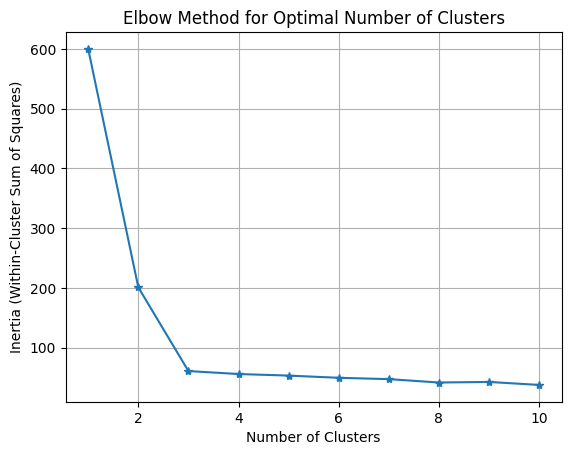

In [45]:
import matplotlib.pyplot as plt
# Plot the Elbow curve
plt.plot(k_values, wcss,marker="*")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [46]:
#optimal k value is 3